<div style="text-align: right"> &uarr;   Ensure Kernel is set to  &uarr;  </div><br><div style="text-align: right"> 
conda_python3  </div>

## Data Download and Understanding

In this notebook we will do the following 

1. Create an S3 bucket 
2. Download data from public s3 bucket owned by Raj 
3. untar the data 
4. upload to your s3 bucket created in first step 
5. examine the data 

### 1. Create an S3 bucket

Change **your-unique-bucket-name** to your unique bucket name. <br>
Note : Bucket names are globally unique

In [65]:
!aws s3 mb s3://<YOUR BUCKET HERE>

make_bucket: agm-scratch


Now lets list all of the buckets in your account. You will see the bucket you just created.

In [66]:
!aws s3 ls

2022-01-31 15:57:01 agm-2022-jan-pii-project
2021-01-06 14:15:03 agm-backup
2021-11-10 19:01:48 agm-bkup
2021-04-21 16:18:58 agm-cgifed-demo
2022-01-31 17:14:05 agm-comprehend-pii-project
2021-04-14 16:13:23 agm-data-wrangler-demo
2021-05-07 13:51:53 agm-deloitte-datawrangler
2020-12-14 15:03:27 agm-dov-temp
2022-01-13 09:16:25 agm-fraud-detect
2021-04-09 16:57:57 agm-gini2
2021-01-19 15:08:02 agm-ml-lm
2022-07-25 20:14:12 agm-recordings
2022-08-22 15:08:20 agm-scratch
2021-09-23 13:04:21 agm-smstudio-archive
2021-06-04 16:19:56 agm-temp
2022-05-04 13:12:56 agm-temp-5-4-22
2021-10-27 19:46:24 agm-temp-smproc
2022-02-04 17:13:02 agm-tm-bkup
2021-04-12 14:40:20 agm-traffic-class
2022-04-04 13:10:53 agm-trans-input
2022-04-04 13:11:09 agm-trans-output
2020-06-11 19:24:21 agmdeeplens
2020-11-20 20:16:05 agmlabtest
2020-05-22 14:16:38 agmmylab
2021-03-23 21:52:06 aws-emr-resources-650687152614-us-east-1
2021-12-23 16:11:37 aws-gdms-objdetect
2020-12-09 17:40:07 aws-glue-650687152614-us-east

### 2. Download Data

Here we are going to copy the dataset we will be using for the labs today from our public bucket.

In [67]:
!aws s3 cp s3://ml-materials/junctions-data.tar.gz .

download: s3://ml-materials/junctions-data.tar.gz to ./junctions-data.tar.gz


### 3. Uncompress the downloaded data

We now uncompress extract the TAR archive on our notebook instance

In [68]:
!tar -xzf junctions-data.tar.gz . --no-same-owner

### 4. Upload data to your bucket

Now we copy the extracted dataset to your previously created **S3** bucket 
Change **your-unique-bucket-name** to your unique bucket name that you created earlier.<br>
*Note : Bucket names are globally unique*

In [69]:
!aws s3 sync ./data/ s3://<YOUR BUCKET HERE>

upload: data/test/Priority/P1.png to s3://agm-scratch/test/Priority/P1.png         
upload: data/test/Roundabout/R1.png to s3://agm-scratch/test/Roundabout/R1.png     
upload: data/test/Priority/P2.png to s3://agm-scratch/test/Priority/P2.png         
upload: data/test/Signal/S1.png to s3://agm-scratch/test/Signal/S1.png            
upload: data/test/Roundabout/R3.png to s3://agm-scratch/test/Roundabout/R3.png    
upload: data/test/Signal/S2.png to s3://agm-scratch/test/Signal/S2.png            
upload: data/test/Roundabout/R2.png to s3://agm-scratch/test/Roundabout/R2.png    
upload: data/test/Signal/X1.png to s3://agm-scratch/test/Signal/X1.png           
upload: data/train/Priority/12481.png to s3://agm-scratch/train/Priority/12481.png
upload: data/train/Priority/26009.png to s3://agm-scratch/train/Priority/26009.png
upload: data/train/Priority/26004.png to s3://agm-scratch/train/Priority/26004.png
upload: data/train/Priority/19196.png to s3://agm-scratch/train/Priority/19196.png
up

### 5. Quick Examination of images from 3 classes

Feel free to play with changing the image names or plotting your own. We will do this again inside Tensorflow notebook.

*Note: data below is from local drive*

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'draw']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


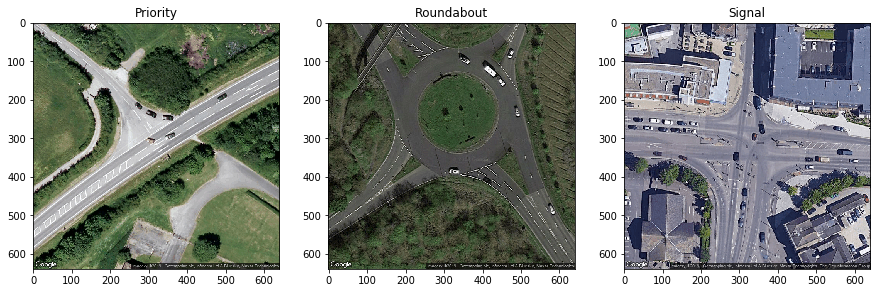

In [70]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
f, axs = plt.subplots(1,3,figsize=(15,15))
img1 = mpimg.imread('./data/train/Priority/12481.png')
img2 = mpimg.imread('./data/train/Roundabout/53408.png')
img3 = mpimg.imread('./data/train/Signal/27258.png')

axs[0].imshow(img1)
axs[0].set_title("Priority")
axs[1].imshow(img2)
axs[1].set_title("Roundabout")
axs[2].imshow(img3)
axs[2].set_title("Signal")

plt.show()

In [71]:
from io import BytesIO

In [72]:
a = BytesIO()

In [73]:
! ls data/train/Signal/26046.png

data/train/Signal/26046.png


In [74]:
from tensorflow.keras.preprocessing import image
import numpy as np
import json
import sys
import requests
from PIL import Image
import io

target_size=(224,224)
img = Image.open('data/train/Signal/26046.png')
img = img.convert('RGB')
img = img.resize(target_size, Image.NEAREST)
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0)
x = x.tolist()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  if sys.path[0] == '':


In [75]:
type(x)

list

In [76]:
x.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
type(nuimg)

In [ ]:
g = np.array(x)

In [ ]:
y = g[0,:,:,:]

In [ ]:
y.shape

In [ ]:
neximg = Image.fromarray(y.astype(np.uint8)).convert('RGB')

In [ ]:
type(neximg)

In [ ]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 

draw = ImageDraw.Draw(neximg)
# font = ImageFont.truetype(<font-file>, <font-size>)
font = ImageFont.load_default()
# draw.text((x, y),"Sample Text",(r,g,b))
draw.text((0, 0),"Sample Text",(255,255,255),font=font)


In [ ]:
display(neximg)